# LE dataset

In [1]:
import os
import yasa
import pandas as pd
import get_acc_matrix
import matplotlib.pyplot as plt

In [2]:
path_subejcts_g_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\ground_truth' 
subjects_g_hypno = os.listdir(path_subejcts_g_hpyno)
subjects_g_hypno.sort()
subjects_g_hypno = subjects_g_hypno[0:8]
print("[Ground-truth]")
print("   -- path of ground_truth: {}".format(path_subejcts_g_hpyno))
print("   -- csv files: {}".format(subjects_g_hypno))

path_subejcts_p_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\pred_filt_reref' 
subjects_p_hypno = os.listdir(path_subejcts_p_hpyno)
subjects_p_hypno.sort()
subjects_p_hypno = subjects_p_hypno[0:8]
print("\n[Predicted]")
print("   -- path of predicted: {}".format(path_subejcts_p_hpyno))
print("   -- folders for the each subject: {}".format(subjects_p_hypno))

[Ground-truth]
   -- path of ground_truth: D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth
   -- csv files: ['LE004.csv', 'LE010.csv', 'LE011.csv', 'LE014.csv', 'LE019.csv', 'LE020.csv', 'LE021.csv', 'LE023.csv']

[Predicted]
   -- path of predicted: D:\USC\code_mine\Model_validation\YASA\hypnograms\pred_filt_reref
   -- folders for the each subject: ['LE004', 'LE010', 'LE011', 'LE014', 'LE019', 'LE020', 'LE021', 'LE023']


In [3]:
dic_acc_total = {} # subect 별로 chan_comb에 따른 overall accuracy가 저장됨
dic_matrix_total = {} # subject 별로 6개의 matrix가 저장됨
key_total = [] # subject name이 key로써 저장됨
sub_num = 0

for subject in subjects_p_hypno:
    print('========================================')
    path_g_hypno = os.path.join(path_subejcts_g_hpyno, subjects_g_hypno[sub_num])
    print(f"-- now ground_truth:\n   {path_g_hypno}")
    g_hypno = pd.read_csv(path_g_hypno).squeeze()

    csv_p_hypnos = os.listdir(os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno'))
    print(f"\n-- pridicted hypnograms: {subject} --> {csv_p_hypnos}")

    dic_acc_sub = {} # 한 명의 subject 내에서, 채널 조합 별 acc를 저장하는 dictionary
    dic_matrix_sub = {} # 한 명의 subject 내에서, 채널 조합 별 matrix를 저장하는 dictionary

    path_p_hypno = os.path.join(path_subejcts_p_hpyno, subject, 'pred_hypno', 'pred_hypno_C4.csv')
#         print(path_p_hypno)
    p_hypno = pd.read_csv(path_p_hypno).squeeze()

    # overall accuracy
    accuracy = (g_hypno == p_hypno).sum() / p_hypno.size * 100 # 현재 channel combination에 대한 overall accuracy 계산
#     dic_acc_sub[] = accuracy # dictionary에 추가  

#     # accuracy matrix
    matrix = get_acc_matrix.get_acc_matrix(g_hypno, p_hypno)
#     dic_matrix_sub[dic_acc_sub_key[ch_comb_num]] = matrix 
 

    key_total.append(subject)
    dic_acc_total[key_total[sub_num]] = accuracy
    dic_matrix_total[key_total[sub_num]] = matrix
    sub_num += 1

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\LE004.csv

-- pridicted hypnograms: LE004 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\LE010.csv

-- pridicted hypnograms: LE010 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\LE011.csv

-- pridicted hypnograms: LE011 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\LE014.csv

-- pridicted hypnograms: LE014 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\LE019.csv

-- pridicted hypnograms: LE019 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\LE020.csv

-- pridicted hypnograms: LE020 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnogr

In [6]:
df_acc = pd.DataFrame(dic_acc_total, index=['Accuracy'])
df_acc['mean'] = df_acc.mean(axis=1)
df_acc

,LE004,LE010,LE011,LE014,LE019,LE020,LE021,LE023,mean
Accuracy,39.191291,77.718121,73.09185,78.488372,72.334294,77.363897,77.361319,59.615385,69.395566


([<matplotlib.axis.XTick at 0x15ac734a700>,
 [Text(0, 0, 'LE004'),
  Text(1, 0, 'LE010'),
  Text(2, 0, 'LE011'),
  Text(3, 0, 'LE014'),
  Text(4, 0, 'LE019'),
  Text(5, 0, 'LE020'),
  Text(6, 0, 'LE021'),
  Text(7, 0, 'LE023')])

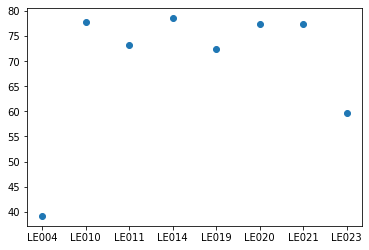

In [8]:
plt.scatter(range(8), df_acc.iloc[:, :8])
plt.xticks(range(8),df_acc.columns[:8])

In [13]:
df_acc.iloc[:,:8].transpose()

,Accuracy
LE004,39.191291
LE010,77.718121
LE011,73.091850
LE014,78.488372
LE019,72.334294
LE020,77.363897
LE021,77.361319
LE023,59.615385


<AxesSubplot:xlabel='Accuracy', ylabel='Density'>

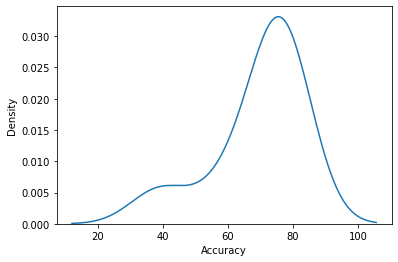

In [14]:
import seaborn as sns
sns.kdeplot(df_acc.iloc[:,:8].transpose()['Accuracy'])

# VD dataset

In [1]:
import os
import yasa
import pandas as pd
import get_acc_matrix

In [2]:
path_subejcts_g_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\ground_truth' 
subjects_g_hypno = os.listdir(path_subejcts_g_hpyno)
subjects_g_hypno.sort()
subjects_g_hypno = subjects_g_hypno[15:]
print("[Ground-truth]")
print("   -- path of ground_truth: {}".format(path_subejcts_g_hpyno))
print("   -- csv files: {}".format(subjects_g_hypno))

path_subejcts_p_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\pred_filt_reref' 
subjects_p_hypno = os.listdir(path_subejcts_p_hpyno)
subjects_p_hypno.sort()
subjects_p_hypno = subjects_p_hypno[15:]
print("\n[Predicted]")
print("   -- path of predicted: {}".format(path_subejcts_p_hpyno))
print("   -- folders for the each subject: {}".format(subjects_p_hypno))

[Ground-truth]
   -- path of ground_truth: D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth
   -- csv files: ['VD001.csv', 'VD002.csv', 'VD003.csv', 'VD004.csv', 'VD005.csv', 'VD006.csv', 'VD008.csv', 'VD011.csv', 'VD012.csv', 'VD017.csv', 'VD019.csv', 'VD022.csv', 'VD023.csv', 'VD025.csv', 'VD028.csv', 'VD029.csv', 'VD030.csv', 'VD031.csv', 'VD033.csv', 'VD034.csv', 'VD039.csv', 'VD041.csv', 'VD042.csv', 'VD043.csv', 'VD044.csv', 'VD045.csv', 'VD046.csv', 'VD047.csv', 'VD049.csv', 'VD050.csv', 'VD051.csv', 'VD052.csv', 'VD053.csv', 'VD054.csv', 'VD055.csv', 'VD056.csv', 'VD057.csv', 'VD058.csv']

[Predicted]
   -- path of predicted: D:\USC\code_mine\Model_validation\YASA\hypnograms\pred_filt_reref
   -- folders for the each subject: ['VD001', 'VD002', 'VD003', 'VD004', 'VD005', 'VD006', 'VD008', 'VD011', 'VD012', 'VD017', 'VD019', 'VD022', 'VD023', 'VD025', 'VD028', 'VD029', 'VD030', 'VD031', 'VD033', 'VD034', 'VD039', 'VD041', 'VD042', 'VD043', 'VD044', 'VD045', 'VD046'

In [3]:
dic_acc_total = {} # subect 별로 chan_comb에 따른 overall accuracy가 저장됨
dic_matrix_total = {} # subject 별로 6개의 matrix가 저장됨
key_total = [] # subject name이 key로써 저장됨
sub_num = 0

for subject in subjects_p_hypno:
    print('========================================')
    path_g_hypno = os.path.join(path_subejcts_g_hpyno, subjects_g_hypno[sub_num])
    print(f"-- now ground_truth:\n   {path_g_hypno}")
    g_hypno = pd.read_csv(path_g_hypno).squeeze()

    csv_p_hypnos = os.listdir(os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno'))
    print(f"\n-- pridicted hypnograms: {subject} --> {csv_p_hypnos}")

    dic_acc_sub = {} # 한 명의 subject 내에서, 채널 조합 별 acc를 저장하는 dictionary
    dic_matrix_sub = {} # 한 명의 subject 내에서, 채널 조합 별 matrix를 저장하는 dictionary

    path_p_hypno = os.path.join(path_subejcts_p_hpyno, subject, 'pred_hypno', 'pred_hypno_C4.csv')
#         print(path_p_hypno)
    p_hypno = pd.read_csv(path_p_hypno).squeeze()

    # overall accuracy
    accuracy = (g_hypno == p_hypno).sum() / p_hypno.size * 100 # 현재 channel combination에 대한 overall accuracy 계산
#     dic_acc_sub[] = accuracy # dictionary에 추가  

#     # accuracy matrix
    matrix = get_acc_matrix.get_acc_matrix(g_hypno, p_hypno)
#     dic_matrix_sub[dic_acc_sub_key[ch_comb_num]] = matrix 
 

    key_total.append(subject)
    dic_acc_total[key_total[sub_num]] = accuracy
    dic_matrix_total[key_total[sub_num]] = matrix
    sub_num += 1

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD001.csv

-- pridicted hypnograms: VD001 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD002.csv

-- pridicted hypnograms: VD002 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD003.csv

-- pridicted hypnograms: VD003 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD004.csv

-- pridicted hypnograms: VD004 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD005.csv

-- pridicted hypnograms: VD005 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\VD006.csv

-- pridicted hypnograms: VD006 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnogr

In [4]:
df_acc = pd.DataFrame(dic_acc_total, index=['Accuracy'])
df_acc['mean'] = df_acc.mean(axis=1)
df_acc.loc[:,'VD001':'VD058'].transpose().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Accuracy,38.0,66.116906,9.147912,42.522757,61.859724,65.885718,71.594416,84.237074


([<matplotlib.axis.XTick at 0x1b6867e10a0>,
 [Text(0, 0, 'VD001'),
  Text(1, 0, 'VD002'),
  Text(2, 0, 'VD003'),
  Text(3, 0, 'VD004'),
  Text(4, 0, 'VD005'),
  Text(5, 0, 'VD006'),
  Text(6, 0, 'VD008'),
  Text(7, 0, 'VD011'),
  Text(8, 0, 'VD012'),
  Text(9, 0, 'VD017'),
  Text(10, 0, 'VD019'),
  Text(11, 0, 'VD022'),
  Text(12, 0, 'VD023'),
  Text(13, 0, 'VD025'),
  Text(14, 0, 'VD028'),
  Text(15, 0, 'VD029'),
  Text(16, 0, 'VD030'),
  Text(17, 0, 'VD031'),
  Text(18, 0, 'VD033'),
  Text(19, 0, 'VD034'),
  Text(20, 0, 'VD039'),
  Text(21, 0, 'VD041'),
  Text(22, 0, 'VD042'),
  Text(23, 0, 'VD043'),
  Text(24, 0, 'VD044'),
  Text(25, 0, 'VD045'),
  Text(26, 0, 'VD046'),
  Text(27, 0, 'VD047'),
  Text(28, 0, 'VD049'),
  Text(29, 0, 'VD050'),
  Text(30, 0, 'VD051'),
  Text(31, 0, 'VD052'),
  Text(32, 0, 'VD053'),
  Text(33, 0, 'VD054'),
  Text(34, 0, 'VD055'),
  Text(35, 0, 'VD056'),
  Text(36, 0, 'VD057'),
  Text(37, 0, 'VD058')])

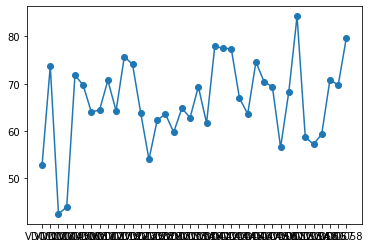

In [7]:
import matplotlib.pyplot as plt
plt.scatter(range(38), df_acc.loc['Accuracy', :])
plt.plot(range(38), df_acc.loc['Accuracy', :])

plt.xticks(range(38),df_acc.columns)

<AxesSubplot:xlabel='Accuracy', ylabel='Density'>

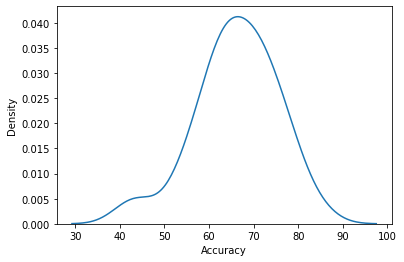

In [9]:
import seaborn as sns
sns.kdeplot(df_acc.transpose().loc['VD001':'VD058', 'Accuracy'])

In [ ]:
import seaborn as sns
sns.kdeplot(df_acc.iloc[:,:8].transpose()['Accuracy'])

# PE dataset

In [3]:
import os
import yasa
import pandas as pd
import get_acc_matrix

In [4]:
path_subejcts_g_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\ground_truth' 
subjects_g_hypno = os.listdir(path_subejcts_g_hpyno)
subjects_g_hypno.sort()
subjects_g_hypno = subjects_g_hypno[8:15]
print("[Ground-truth]")
print("   -- path of ground_truth: {}".format(path_subejcts_g_hpyno))
print("   -- csv files: {}".format(subjects_g_hypno))

path_subejcts_p_hpyno = 'D:\\USC\\code_mine\\Model_validation\\YASA\\hypnograms\\pred_filt_reref' 
subjects_p_hypno = os.listdir(path_subejcts_p_hpyno)
subjects_p_hypno.sort()
subjects_p_hypno = subjects_p_hypno[8:15]
print("\n[Predicted]")
print("   -- path of predicted: {}".format(path_subejcts_p_hpyno))
print("   -- folders for the each subject: {}".format(subjects_p_hypno))

[Ground-truth]
   -- path of ground_truth: D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth
   -- csv files: ['PE150386.csv', 'PE180205.csv', 'PE180682.csv', 'PE180955.csv', 'PE181067.csv', 'PE190065.csv', 'PE190925.csv']

[Predicted]
   -- path of predicted: D:\USC\code_mine\Model_validation\YASA\hypnograms\pred_filt_reref
   -- folders for the each subject: ['PE150386', 'PE180205', 'PE180682', 'PE180955', 'PE181067', 'PE190065', 'PE190925']


In [5]:
dic_acc_total = {} # subect 별로 chan_comb에 따른 overall accuracy가 저장됨
dic_matrix_total = {} # subject 별로 6개의 matrix가 저장됨
key_total = [] # subject name이 key로써 저장됨
sub_num = 0

for subject in subjects_p_hypno:
    print('========================================')
    path_g_hypno = os.path.join(path_subejcts_g_hpyno, subjects_g_hypno[sub_num])
    print(f"-- now ground_truth:\n   {path_g_hypno}")
    g_hypno = pd.read_csv(path_g_hypno).squeeze()

    csv_p_hypnos = os.listdir(os.path.join(path_subejcts_p_hpyno, subjects_p_hypno[sub_num], 'pred_hypno'))
    print(f"\n-- pridicted hypnograms: {subject} --> {csv_p_hypnos}")

    dic_acc_sub = {} # 한 명의 subject 내에서, 채널 조합 별 acc를 저장하는 dictionary
    dic_matrix_sub = {} # 한 명의 subject 내에서, 채널 조합 별 matrix를 저장하는 dictionary

    path_p_hypno = os.path.join(path_subejcts_p_hpyno, subject, 'pred_hypno', 'pred_hypno_C4.csv')
#         print(path_p_hypno)
    p_hypno = pd.read_csv(path_p_hypno).squeeze()

    # overall accuracy
    accuracy = (g_hypno == p_hypno).sum() / p_hypno.size * 100 # 현재 channel combination에 대한 overall accuracy 계산
#     dic_acc_sub[] = accuracy # dictionary에 추가  

#     # accuracy matrix
    matrix = get_acc_matrix.get_acc_matrix(g_hypno, p_hypno)
#     dic_matrix_sub[dic_acc_sub_key[ch_comb_num]] = matrix 
 

    key_total.append(subject)
    dic_acc_total[key_total[sub_num]] = accuracy
    dic_matrix_total[key_total[sub_num]] = matrix
    sub_num += 1

-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\PE150386.csv

-- pridicted hypnograms: PE150386 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\PE180205.csv

-- pridicted hypnograms: PE180205 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\PE180682.csv

-- pridicted hypnograms: PE180682 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\PE180955.csv

-- pridicted hypnograms: PE180955 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\PE181067.csv

-- pridicted hypnograms: PE181067 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\code_mine\Model_validation\YASA\hypnograms\ground_truth\PE190065.csv

-- pridicted hypnograms: PE190065 --> ['pred_hypno_C4.csv']
-- now ground_truth:
   D:\USC\cod

In [6]:
df_acc = pd.DataFrame(dic_acc_total, index=['Accuracy'])
df_acc

,PE150386,PE180205,PE180682,PE180955,PE181067,PE190065,PE190925
Accuracy,60.268456,59.041394,75.29976,60.377358,58.36478,87.394167,61.590038


In [7]:
subject_num_by_disorder = ['PE190065', 'PE190925', 'PE181067', 'PE150386', 'PE180205', 'PE180682', 'PE180955']
disorder_types = ['normal', 'OSA_1', 'OSA_2', 'Insomnia_1', 'Insomnia_2', 'COMISA_1', 'COMISA_2', '-']
# new_index = key_total
# new_index.insert(0, 'type')
# new_index

df_acc = df_acc[subject_num_by_disorder] # column 재배치
df_acc.loc[:,'mean'] = df_acc.loc[:, :].mean(axis=1) # mean column 추가
df_acc.loc['type',:] = disorder_types

df_acc

C:\Users\CYS\AppData\Local\Temp\ipykernel_19832\2217376526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.loc[:,'mean'] = df_acc.loc[:, :].mean(axis=1) # mean column 추가
C:\Users\CYS\AppData\Local\Temp\ipykernel_19832\2217376526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.loc['type',:] = disorder_types


,PE190065,PE190925,PE181067,PE150386,PE180205,PE180682,PE180955,mean
Accuracy,87.394167,61.590038,58.36478,60.268456,59.041394,75.29976,60.377358,66.047994
type,normal,OSA_1,OSA_2,Insomnia_1,Insomnia_2,COMISA_1,COMISA_2,-


In [ ]:
OSA_1 19 37.1 234
OSA_2 69 53.7 293

In [ ]:
        arousal_index     ISI   Sex
INS_1   15.2              21    M 
INS_2   36.4              19    M 

In [ ]:
          AHI   arousal_index  ISI  Age   Sex
comisa_1  38.5  21.9           25   27.1  M
comisa_2  38.7  38.7           21   61.6  M

In [8]:
df_acc.loc[['type', 'Accuracy'], :]

,PE190065,PE190925,PE181067,PE150386,PE180205,PE180682,PE180955,mean
type,normal,OSA_1,OSA_2,Insomnia_1,Insomnia_2,COMISA_1,COMISA_2,-
Accuracy,87.394167,61.590038,58.36478,60.268456,59.041394,75.29976,60.377358,66.047994


In [15]:
df_acc.columns = ['normal', 'OSA_1', 'OSA_2', 'Insomnia_1', 'Insomnia_2', 'COMISA_1', 'COMISA_2', 'mean']
pd.DataFrame(df_acc.loc['Accuracy', :]).transpose()

,normal,OSA_1,OSA_2,Insomnia_1,Insomnia_2,COMISA_1,COMISA_2,mean
Accuracy,87.394167,61.590038,58.36478,60.268456,59.041394,75.29976,60.377358,66.047994


([<matplotlib.axis.XTick at 0x24f66816f10>,
 [Text(0, 0, 'normal'),
  Text(1, 0, 'OSA_1'),
  Text(2, 0, 'OSA_2'),
  Text(3, 0, 'Insomnia_1'),
  Text(4, 0, 'Insomnia_2'),
  Text(5, 0, 'COMISA_1'),
  Text(6, 0, 'COMISA_2')])

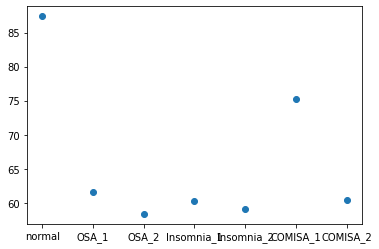

In [10]:
import matplotlib.pyplot as plt
plt.scatter(range(7), df_acc.loc['Accuracy', :'PE180955'])
plt.xticks(range(7),df_acc.loc['type', :'PE180955'])

# matrix 와 heatmap은 따로 노트북 만들자

([<matplotlib.axis.XTick at 0x1cb832add90>,
 [Text(0, 0, 'normal'),
  Text(1, 0, 'OSA_1'),
  Text(2, 0, 'OSA_2'),
  Text(3, 0, 'Insomnia_1'),
  Text(4, 0, 'Insomnia_2'),
  Text(5, 0, 'COMISA_1'),
  Text(6, 0, 'COMISA_2')])

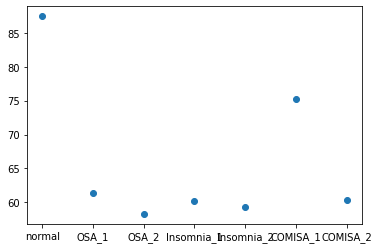

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(range(7), df_acc_C4)
plt.xticks(range(7),df_acc.loc['type', :'PE180955'].values)

# matrix

In [34]:
df_matrix = pd.DataFrame(dic_matrix_total)
df_matrix = df_matrix[subject_num_by_disorder]
df_matrix

,PE190065,PE190925,PE181067,PE150386,PE180205,PE180682,PE180955
IO_C3,Wake R N1 N2 N3 Wake 96.7 ...,Wake R N1 N2 N3 Wake 77.4 ...,Wake R N1 N2 N3 Wake 78.0 ...,Wake R N1 N2 N3 Wake 81.3 ...,Wake R N1 N2 N3 Wake 71.6 ...,Wake R N1 N2 N3 Wake 79.8 ...,Wake R N1 N2 N3 Wake 57.9 ...
IO_C4,Wake R N1 N2 N3 Wake 97.5 ...,Wake R N1 N2 N3 Wake 75.7 ...,Wake R N1 N2 N3 Wake 75.2 ...,Wake R N1 N2 N3 Wake 81.3 ...,Wake R N1 N2 N3 Wake 67.2 ...,Wake R N1 N2 N3 Wake 76.6 ...,Wake R N1 N2 N3 Wake 57.9 ...
no_eog_C3,Wake R N1 N2 N3 Wake 97.9 ...,Wake R N1 N2 N3 Wake 75.0 ...,Wake R N1 N2 N3 Wake 60.3 ...,Wake R N1 N2 N3 Wake 79.1 ...,Wake R N1 N2 N3 Wake 71.0 ...,Wake R N1 N2 N3 Wake 78.7 ...,Wake R N1 N2 N3 Wake 51.9 ...
no_eog_C4,Wake R N1 N2 N3 Wake 98.3 ...,Wake R N1 N2 N3 Wake 75.0 ...,Wake R N1 N2 N3 Wake 66.0 ...,Wake R N1 N2 N3 Wake 80.2 ...,Wake R N1 N2 N3 Wake 66.1 ...,Wake R N1 N2 N3 Wake 76.6 ...,Wake R N1 N2 N3 Wake 54.9 ...
SO_C3,Wake R N1 N2 N3 Wake 94.6 ...,Wake R N1 N2 N3 Wake 76.7 ...,Wake R N1 N2 N3 Wake 71.6 ...,Wake R N1 N2 N3 Wake 83.5 ...,Wake R N1 N2 N3 Wake 73.8 ...,Wake R N1 N2 N3 Wake 78.7 ...,Wake R N1 N2 N3 Wake 55.6 ...
SO_C4,Wake R N1 N2 N3 Wake 95.4 ...,Wake R N1 N2 N3 Wake 77.8 ...,Wake R N1 N2 N3 Wake 70.2 1...,Wake R N1 N2 N3 Wake 82.4 ...,Wake R N1 N2 N3 Wake 71.0 ...,Wake R N1 N2 N3 Wake 76.6 ...,Wake R N1 N2 N3 Wake 55.6 ...


In [36]:
df_matrix_C4 = df_matrix.loc['no_eog_C4', :]
df_matrix_C4

PE190065          Wake     R   N1    N2    N3
Wake  98.3  ...
PE190925          Wake     R    N1    N2   N3
Wake  75.0  ...
PE181067          Wake     R   N1    N2    N3
Wake  66.0  ...
PE150386          Wake     R    N1    N2    N3
Wake  80.2 ...
PE180205          Wake     R   N1    N2    N3
Wake  66.1  ...
PE180682          Wake     R   N1    N2    N3
Wake  76.6  ...
PE180955          Wake     R   N1    N2    N3
Wake  54.9  ...
Name: no_eog_C4, dtype: object

In [37]:
df_matrix_C4[0]

,Wake,R,N1,N2,N3
Wake,98.3,0.4,0.2,0.8,0.2
R,2.2,79.1,0.0,13.2,4.4
N1,25.0,44.1,7.4,20.6,1.5
N2,0.4,3.3,0.4,83.5,12.1
N3,0.0,0.0,0.0,0.8,98.3


In [44]:
df_matrix_C4[6]

,Wake,R,N1,N2,N3
Wake,54.9,10.5,2.3,31.6,0.0
R,2.9,94.8,0.0,1.7,0.0
N1,45.8,3.0,9.6,40.4,0.6
N2,8.3,3.2,4.1,69.1,15.0
N3,0.0,0.0,0.0,20.0,73.3


# prob_matrix

['PE150386', 'PE180205', 'PE180682', 'PE180955', 'PE181067', 'PE190065', 'PE190925']


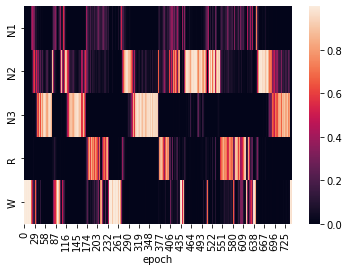

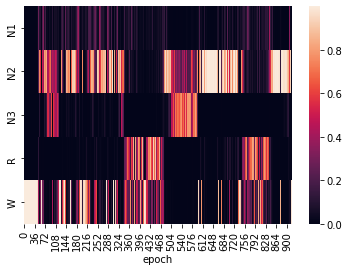

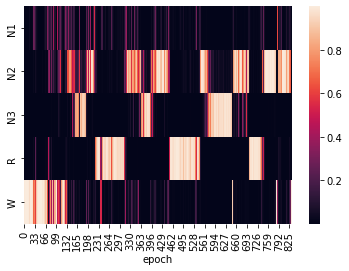

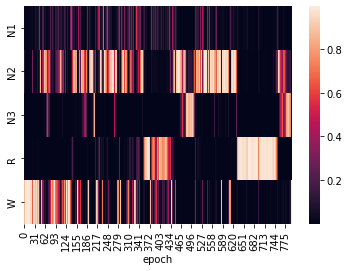

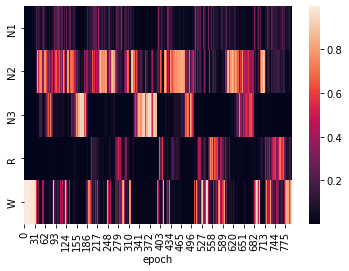

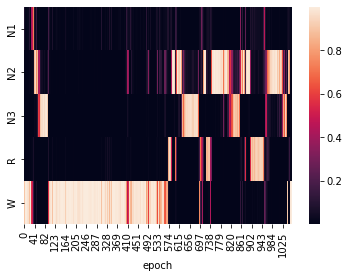

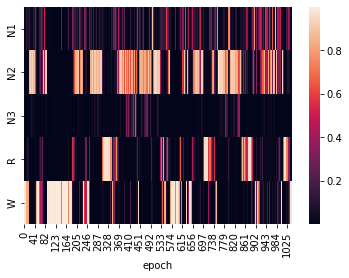

In [58]:
# C4에 해당하는 prob_matrix만 가져오자

path_subjects_prob = 'D:\\USC\\code_mine\\PE_test\\hypnogram\\predicted_with_filt'
subjects_prob = os.listdir(path_subjects_prob)
print(subjects_prob)

for subject in subjects_prob:
    path_matrix = os.path.join(path_subjects_prob, subject, 'prob', '_no_eog_C4_prob.csv')
    df_prob = pd.read_csv(path_matrix, index_col=0)
    plt.figure()
    sns.heatmap(df_prob.transpose())

# hypnogram

In [ ]:
import yasa

path_subjects_g_hypno = 'D:\\USC\\code_mine\\PE_test\\hypnogram\\ground_truth'
subjects_g_hypno= os.listdir(path_subjects_g_hypno)
print(subjects_g_hypno)

path_subjects_p_hypno = 'D:\\USC\\code_mine\\PE_test\\hypnogram\\predicted_with_filt'
subjects_p_hypno= os.listdir(path_subjects_p_hypno)
print(subjects_p_hypno)

for subject in subjects_p_hypno:
    path_p_hypno = os.path.join(path_subjects_p_hypno, subject, 'pred_hypno', '_no_eog_C4.csv')
    hypno = pd.read_csv(path_p_hypno, index_col=0).squeeze()
    plt.figure()
    yasa.plot_hypnogram(hypno)

# after reref